## Data Analysis On Walmart

- ANALYSIS 

## Installing Packages and Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
import mplcursors



## Step 1: Download the dataset

In [8]:
# Extrating Raw Data for Walmart
csv_file_path = '../Final_project/Resources/Walmart.csv'
df = pd.read_csv(csv_file_path)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [10]:
month = df['Month'] = df['Date'].dt.month

In [11]:
year = df['Year'] = df['Date'].dt.year

In [96]:
df['Month'] = month
df['Year'] = year
df['Week'] = df['Date'].dt.isocalendar().week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,week,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9,9


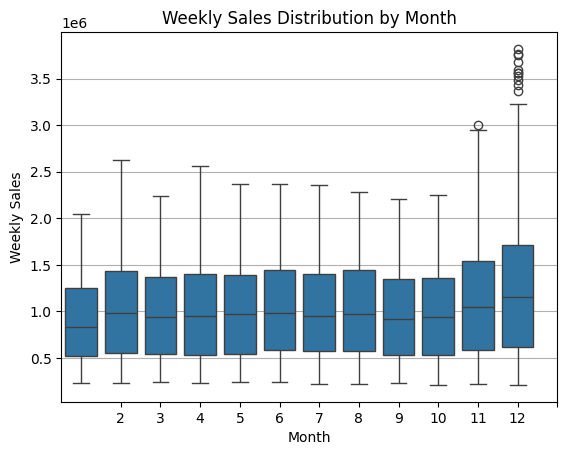

In [14]:
import seaborn as sns
# Plot box plot
sns.boxplot(x='Month', y='Weekly_Sales', data=df)
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution by Month')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()

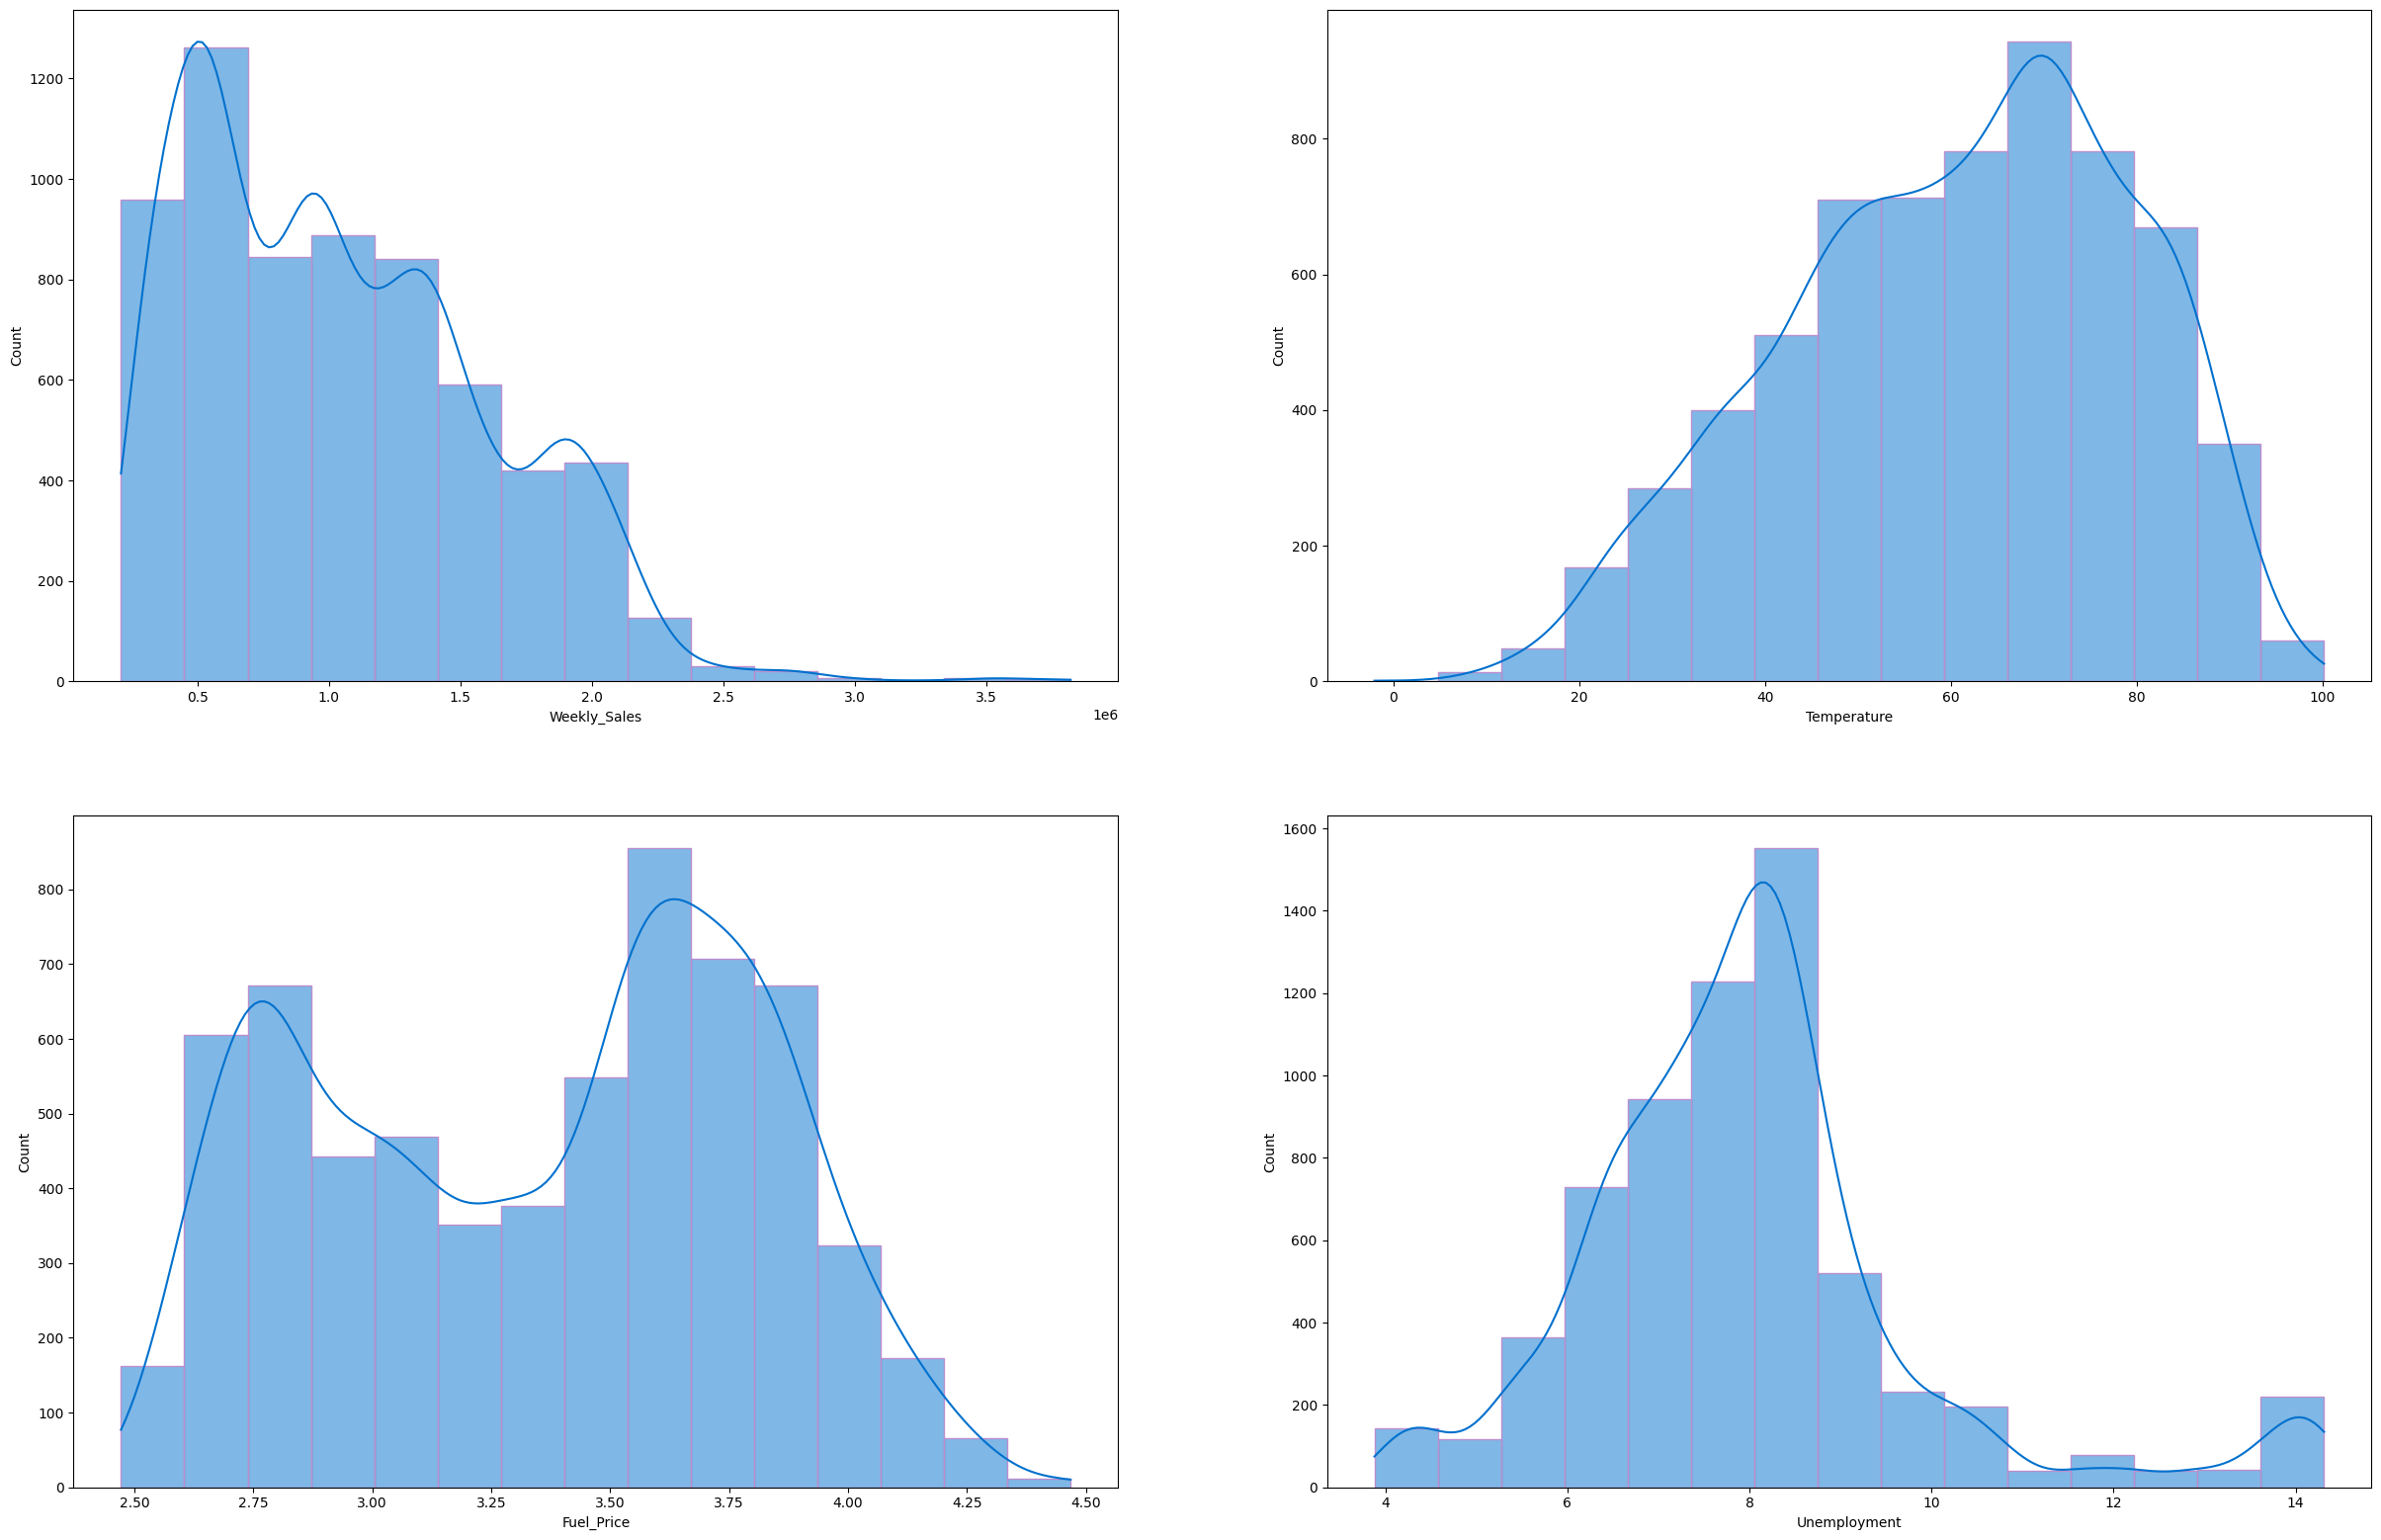

In [85]:
# Create a Histogram to show the distribution of the data for 
# Weekly Sales, "Temperature", "Fuel Price", and "Unemployment"

columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']
plt.figure(figsize=(30,30))
for i,col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = 15, color='#0071CE', edgecolor='#BB8FCE')

In [44]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
figure = px.scatter(
    data_frame=df,
    x="Year",
    y="Month",
    color="Month",
    size="Month",  # Specify the column you want to use for size
    trendline="ols"
)
figure.show()

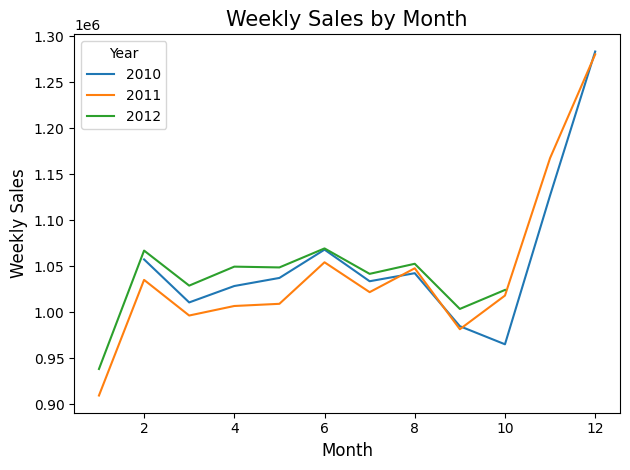

In [86]:
#What are the highest performing months? (Weekly sales by month)

monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")

monthly_sales.plot()

plt.xlabel('Month', fontname="sans-serif", fontsize=12)
plt.ylabel('Weekly Sales', fontname="sans-serif", fontsize=12)
plt.title('Weekly Sales by Month', fontname="sans-serif", fontsize=15)

# plt.xticks(rotation=45, fontname="sans-serif", fontsize=30)
plt.tight_layout()
plt.show()

<Axes: xlabel='Week'>

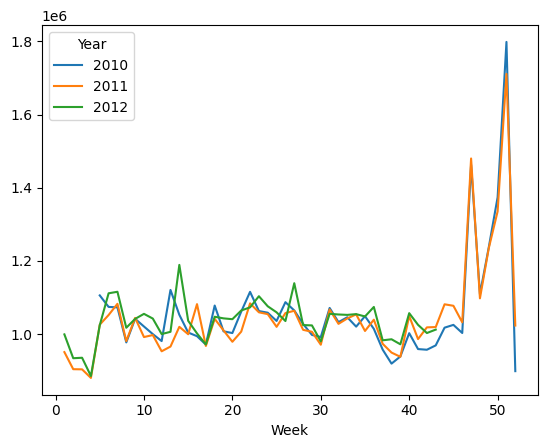

In [99]:
#What are the highest performing weeks? (sales by weeks)
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot()

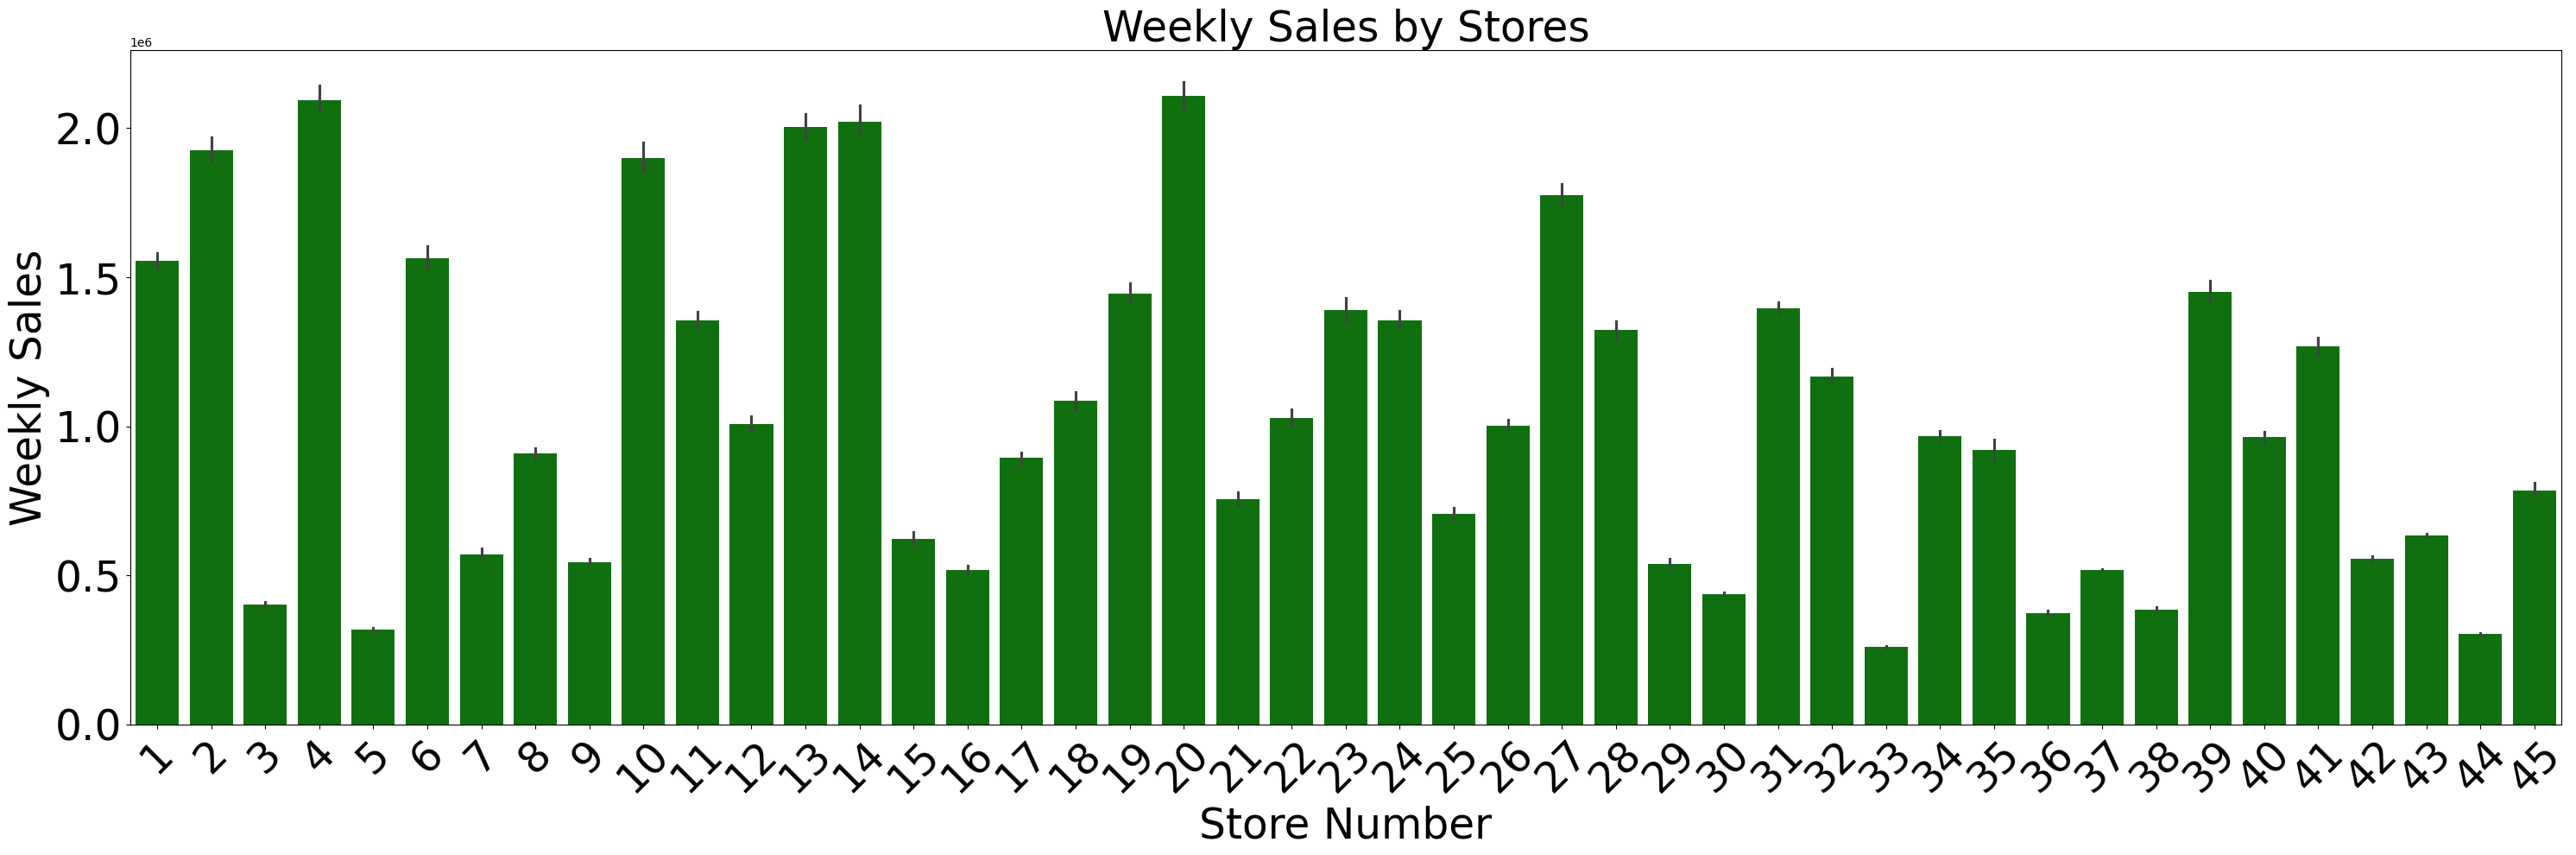

In [100]:
# Assuming df is your DataFrame containing the data
plt.figure(figsize=(30, 10))
fig = sns.barplot(x='Store', y='Weekly_Sales', color='#008000', data=df)

plt.xlabel('Store Number', fontname="sans-serif", fontsize=35)
plt.ylabel('Weekly Sales', fontname="sans-serif", fontsize=35)
plt.title('Weekly Sales by Stores', fontname="sans-serif", fontsize=35)

plt.xticks(rotation=45, fontname="sans-serif", fontsize=35)
plt.yticks(fontname="sans-serif", fontsize=35)
plt.tight_layout()
plt.show()

In [45]:
figure = px.scatter(
    data_frame=df,
    x="Year",
    y="Weekly_Sales",
    color="Store",
    trendline="ols"
)
figure.show()

In [24]:
import pandas as pd
import plotly.graph_objects as go

weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

# Create an interactive time series plot of weekly sales using Plotly
fig = go.Figure()

# Add a trace for weekly sales
fig.add_trace(go.Scatter(x=weekly_sales.index, y=weekly_sales.values, mode='lines+markers', name='Weekly Sales'))

# Update layout
fig.update_layout(
    title='Time Series Plot of Weekly Sales',
    xaxis_title='Date',
    yaxis_title='Weekly Sales',
    hovermode='x',
    showlegend=True
)

fig.show()

In [55]:
# Plot scatter plot of Weekly Sales vs. Temperature

fig = px.scatter(df, x='Temperature', y='Weekly_Sales', title='Weekly Sales vs. Temperature', labels={'Weekly_Sales': 'Weekly Sales'})
fig.update_layout(xaxis_title='Temperature', yaxis_title='Weekly Sales')

In [26]:
# Plot scatter plot of Weekly Sales vs. Fuel Price

fig = px.scatter(df, x='Fuel_Price', y='Weekly_Sales', title='Weekly Sales vs. Fuel Price', labels={'Weekly_Sales': 'Weekly Sales'})
fig.update_layout(xaxis_title='Fuel Price', yaxis_title='Weekly Sales')

fig.show()

In [ ]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

# Create an interactive line plot of Weekly Sales vs. Month using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_sales.index,
                         y=monthly_sales.values,
                         mode='lines+markers',
                         name='Weekly Sales'))

fig.update_layout(title='Weekly Sales vs. Month',
                  xaxis_title='Month',
                  yaxis_title='Average Weekly Sales',
                  xaxis=dict(tickmode='array',
                             tickvals=list(range(1, 13)),
                             ticktext=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))

In [54]:
# Plot scatter plot of Weekly Sales vs. Store

fig = px.scatter(df, x='Store', y='Weekly_Sales', title='Weekly Sales vs. Store', labels={'Weekly_Sales': 'Weekly Sales'})
fig.update_layout(xaxis_title='Store', yaxis_title='Weekly Sales')